<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Intro_to_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Statistics in Python 
course by DataCamp
questions, exercises solved by me

## Summary Statistics

**Mean vs. median**

The mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

* Import matplotlib.pyplot with the alias plt.
* Subset food_consumption to get the rows where food_category is 'rice'.
* Create a histogram of co2_emission for rice and show the plot.

```
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']== 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()
```


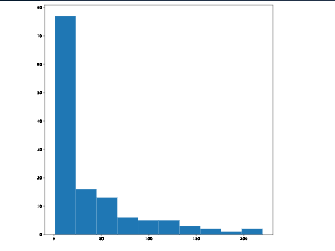

* Take a look at the histogram you just created of different countries' CO2 emissions for rice. Which of the following terms best describes the shape of the data?
>Right-skewed (tail on the right side)

* Use .agg() to calculate the mean and median of co2_emission for rice.

```
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))
```

```
<script.py> output:
    mean      37.591615
    median    15.200000
    Name: co2_emission, dtype: float64
```

* Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?
> Median!

###Measures of spread

* **Variance** - *Average distance from each data point to the data's mean*

**Calculating variance**

1.   To calculate the variance, we start by calculating the distance between each point and the mean, so we get one number for every data point. then square each distance.
2.   Then square each distance and then add them all together. 
3.   Finally, we divide the sum of squared distances by the number of data points minus 1, giving us the variance.

> *The higher the variance, the more spread out the data is.* 

```
#Subtract mean from each data point
dists = msleep['sleep_total'] - np.mean(msleep['sleep_total'])
print(dists)

#Square each distance
sq_dists = dists ** 2
print(sq_dists)

#Sum squared distances
sum_sq_dists = np.sum(sq_dists)
print(sum_sq_dists)

#Divide by number of data points - 1
variance = sum_sq_dists / (83 - 1)
print(variance)
```

**We can calculate the variance in one step using np-dot-var, setting the ddof argument to 1.**

! If we don't specify ddof equals 1, a slightly different formula is used to calculate variance that should only be used on a full population, not a sample.

```
#Use np.var()
np.var(msleep['sleep_total'], ddof=1)

#Without ddof=1 , population variance is calculated instead of sample variance :
np.var(msleep['sleep_total'])
```


* **Standard deviation** - *The standard deviation is another measure of spread, calculated by taking the square root of the variance.* 

!Units are usually easier to understand since they're not squared.

```
#Standard deviation
np.sqrt(np.var(msleep['sleep_total'], ddof=1))

#or in one line:
np.std(msleep['sleep_total'], ddof=1)
```

* **Mean absolute deviation** -  *takes the absolute value of the distances to the mean, and then takes the mean of those differences.* 

> Similar to standard deviation, it's not exactly the same. Standard deviation squares distances, so longer distances are penalized more than shorter ones, while mean absolute deviation penalizes each distance equally. One isn't better than the other, but SD is more common than MAD.

```
dists = msleep['sleep_total'] - mean(msleep$sleep_total)
np.mean(np.abs(dists))
```


* **Quantiles** - *or percentiles, split up the data into some number of equal parts* 

```
np.quantile(msleep['sleep_total'], 0.5)

#We can also pass in a list of numbers to get multiple quantiles at once.
np.quantile(msleep['sleep_total'], [0, 0.25, 0.5, 0.75, 1])

#Quartiles:
np.quantile(msleep['sleep_total'], [0, 0.25, 0.5, 0.75, 1])
```


* **Boxplots use quartiles** - * The boxes in box plots represent quartiles. The bottom of the box is the first quartile, and the top of the box is the third quartile. The middle line is the second quartile, or the median.*

```
 import matplotlib.pyplot as plt
plt.boxplot(msleep['sleep_total'])
plt.show()
```
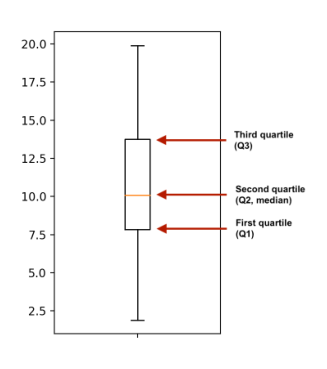


* **Quantiles using np.linspace()** - *split the data in five equal pieces, while using ```np.linspace``` - which takes in the starting number, the stopping number, and the number intervals. We can compute the same quantiles using np-dot-linspace starting at zero, stopping at one, splitting into 5 different intervals.*

```
#np.linspace(start, stop, num)
np.quantile(msleep['sleep_total'], np.linspace(0, 1, 5))
```

* **Interquartile range (IQR)** - *The interquartile range, or IQR, is another measure of spread. It's the distance between the 25th and 75th percentile, which is also the height of the box in a boxplot. We can calculate it using the quantile function, or using the iqr function from scipy-dot-stats to get 5-point-9 hours.*

```
np.quantile(msleep['sleep_total'], 0.75) - np.quantile(msleep['sleep_total'], 0.25)

#or
from scipy.stats import iqr
iqr(msleep['sleep_total'])
```
* **Outliers** - *data points that are substantially different from the others.  But how do we know what a substantial difference is? A rule that's often used is that any data point less than the first quartile minus 1-point-5 times the IQR is an outlier, as well as any point greater than the third quartile plus 1-point-5 times the IQR.*

```
#Finding outliers

from scipy.stats import iqr
iqr = iqr(msleep['bodywt'])
lower_threshold = np.quantile(msleep['bodywt'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(msleep['bodywt'], 0.75) + 1.5 * iqr
msleep[(msleep['bodywt'] < lower_threshold) | (msleep['bodywt'] > upper_threshold)]
```

* **.describe()** - method for almost every summary statistics to be calculate by inputting just a one line of code. Useful to generally understand the data.

```
msleep['bodywt'].describe()
```

```
count 83.000000
mean 166.136349
std 786.839732
min 0.005000
25% 0.174000
50% 1.670000
75% 41.750000
max 6654.000000
Name: bodywt, dtype: float64
```



**Quartiles, quantiles, and quintiles**

*Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.*

*In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.*


* Calculate the quartiles of the co2_emission column of food_consumption.

```
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))
```
```
[   0.        5.21     16.53     62.5975 1712.    ]
```

* Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.

```
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))
```
```
 [   0.       3.54    11.026   25.59    99.978 1712.   ]
```

* Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).

```
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))
```

```
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
     2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]
```

> While calculating more quantiles gives you a more detailed look at the data, it also produces more numbers, making the summary more difficult to quickly understand.






**Variance and standard deviation**

> Variance and standard deviation are two of the most common ways to measure the spread of a variable. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

* Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.
* Import matplotlib.pyplot with alias plt.
* Create a histogram of co2_emission for the beef food_category and show the plot.
* Create a histogram of co2_emission for the eggs food_category and show the plot.

```
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()
```

```
                         var         std
    food_category                          
    beef           88748.408132  297.906710
    dairy          17671.891985  132.935669
    eggs              21.371819    4.622966
    fish             921.637349   30.358481
    lamb_goat      16475.518363  128.356996
    nuts              35.639652    5.969895
    pork            3094.963537   55.632396
    poultry          245.026801   15.653332
    rice            2281.376243   47.763754
    soybeans           0.879882    0.938020
    wheat             71.023937    8.427570
```

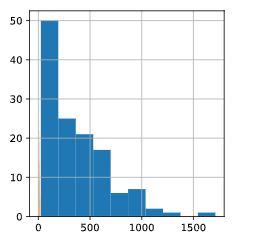


> Beef has the largest amount of variation in its CO2 emissions, while eggs have a relatively small amount of variation.

**Finding outliers using IQR**

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers.

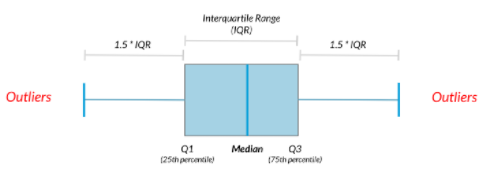

* Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country.

```
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
```
```
country
    Albania      1777.85
    Algeria       707.88
    Angola        412.99
    Argentina    2172.40
    Armenia      1109.93
                  ...   
    Uruguay      1634.91
    Venezuela    1104.10
    Vietnam       641.51
    Zambia        225.30
    Zimbabwe      350.33
    Name: co2_emission, Length: 130, dtype: float64
```

* Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.
* Calculate the interquartile range of emissions_by_country and store it as iqr.

```
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1
```

* Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper.

```
# Calculate the lower and upper cutoffs for outliers
lower= q1 - 1.5 * iqr
upper= q3 + 1.5 * iqr
```

* Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

```
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)
```

```
<script.py> output:
    country
    Argentina    2172.4
    Name: co2_emission, dtype: float64
```

>  It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.




##Random Numbers and Probability

###What are the chances?

>  How to generate random samples and measure chance using probability.

**Measuring chance**

We can calculate the probability of some event by taking the number of ways the event can happen and dividing it by the total number of possible outcomes. For example, if we flip a coin, it can land on either heads or tails. To get the probability of the coin landing on heads, we divide the 1 way to get heads by the two possible outcomes, heads and tails. This gives us one half, or a fifty percent chance of getting heads. Probability is always between zero and 100 percent. If the probability of something is zero, it's impossible, and if the probability of something is 100%, it will certainly happen.

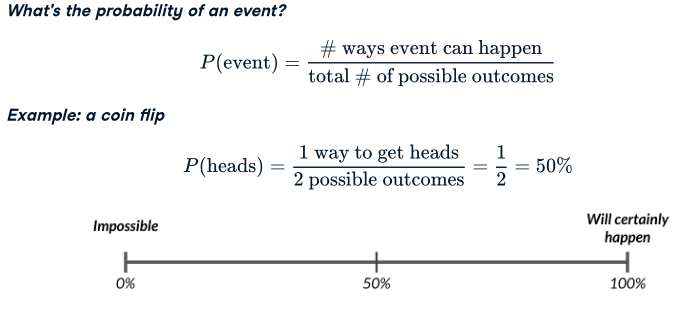



**Sampling**

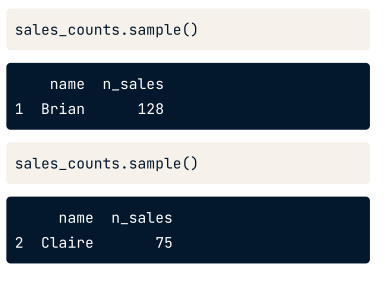

**Setting a random seed** *To ensure we get the same results when we run the script in front of the team, we'll set the random seed using np-dot-random-dot-seed. The seed is a number that Python's random number generator uses as a starting point, so if we orient it with a seed number, it will generate the same random value each time.*

```
np.random.seed(10)
sales_counts.sample()
```



**Sampling without replacement** *When sampling without replacement the number of possible outcomes is decresing. So if we have 4 possible outcomes, and in the last sampling one of them was selected - with chances of selecting it 1/4 (25%) - with the second sampling without replacement, chances of selecting some outcome will be 33% (1/3). Because we have one less possible to pick from.*

**Sampling with replacement** *When sampling with replacement, we are sampling from the set of data which was used in the first sampling. So the possibility of picking some of the outcome is 25% (1/4).*

```
sales_counts.sample(5, replace = True)
```



**Calculating probabilities**

* Count the number of deals Amir worked on for each product type and store in counts.

```
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)
```

* Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.
```
In [4]:
len(amir_deals)
Out[4]:
178
```

```
# Calculate probability of picking a deal with each product
probs = counts/178
print(probs)
```

```
<script.py> output:
    Product B    0.348315
    Product D    0.224719
    Product A    0.129213
    Product C    0.084270
    Product F    0.061798
    Product H    0.044944
    Product I    0.039326
    Product E    0.028090
    Product N    0.016854
    Product G    0.011236
    Product J    0.011236
    Name: product, dtype: float64
```

* If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

> 8.43%



**Sampling deals**

* Set the random seed to 24.
* Take a sample of 5 deals without replacement and store them as sample_without_replacement.

```
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)
```

```
<script.py> output:
         Unnamed: 0    product   client status   amount  num_users
    127         128  Product B  Current    Won  2070.25          7
    148         149  Product D  Current    Won  3485.48         52
    77           78  Product B  Current    Won  6252.30         27
    104         105  Product D  Current    Won  4110.98         39
    166         167  Product C      New   Lost  3779.86         11
```

* Take a sample of 5 deals with replacement and save as sample_with_replacement.

```
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)
```

```
     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63
```




**Discrete distributions**

**Probability distribution** *A probability distribution describes the probability of each possible outcome in a scenario. We can also talk about the expected value of a distribution, which is the mean of a distribution. We can calculate this by multiplying each value by its probabilityand summing.*

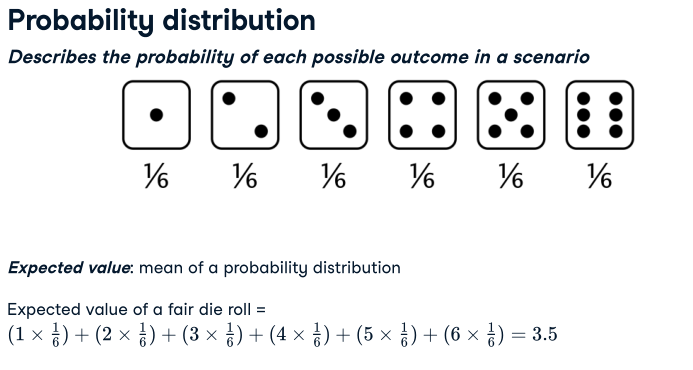

* 

**Visualizing a probability distribution** *using a barplot, where each bar represents an outcome, and each bar's height represents the probability of that outcome.*

We can calculate probabilities of different outcomes by taking areas of the probability distribution. For example, what's the probability that our die roll is less than or equal to 2? To figure this out, we'll take the area of each bar representing an outcome of 2 or less.

Each bar has a width of 1 and a height of one sixth, so the area of each bar is one sixth. We'll sum the areas for 1 and 2, to get a total probability of one third.

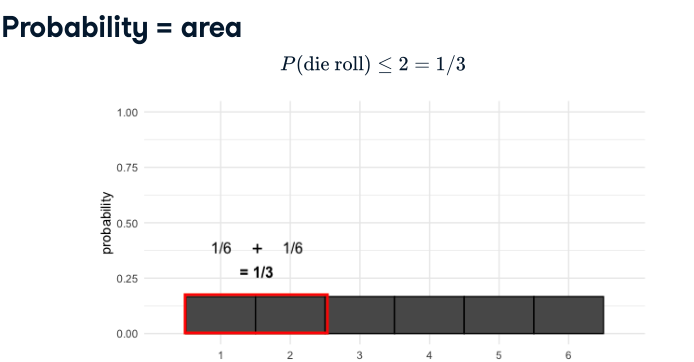



**Uneven die**

Now let's say we have a die where the two got turned into a three. This means that we now have a 0% chance of getting a 2, and a 33% chance of getting a 3. To calculate the expected value of this die, we now multiply 2 by 0, since it's impossible to get a 2, and 3 by its new probability, one third. This gives us an expected value that's slightly higher than the fair die.

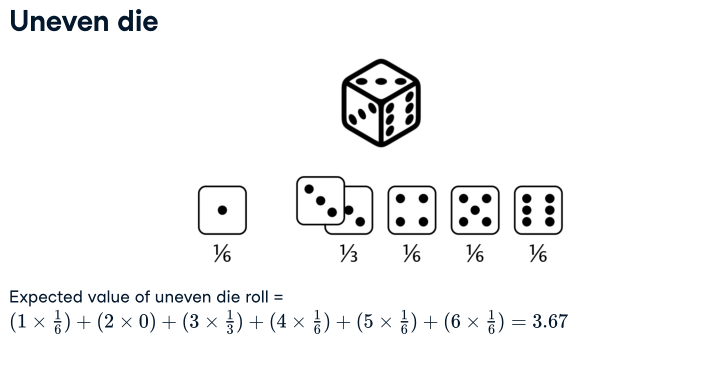

Bars will not be even any longer. 

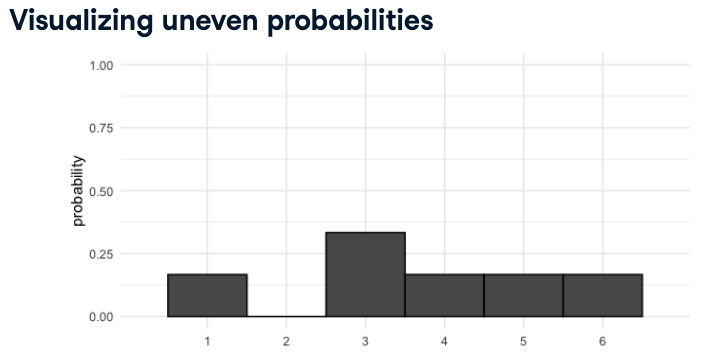

**Discrete probability distributions**

The probability distributions you've seen so far are both discrete probability distributions, since they represent situations with discrete outcomes. Recall from chapter 1 that discrete variables can be thought of as counted variables. When all outcomes have the same probability, like a fair die, this is a special distribution called a *discrete uniform distribution*.


```
#Sampling from discrete distributions
rolls_10 = die.sample(10, replace = True)

#Visualizing a sample
rolls_10['number'].hist(bins=np.linspace(1,7,7))
plt.show()
```

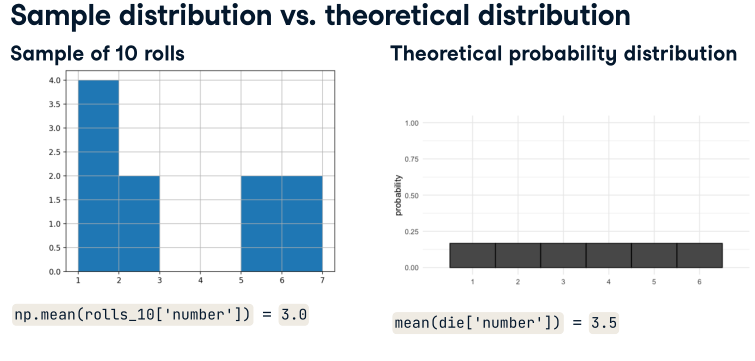



> We can visualize the outcomes of the ten rolls using a histogram, defining the bins we want using np-dot-linspace.

As the size of your sample increases, the sample mean will approach the expected value. This is called the **law of large numbers**, which is the idea that as the size of your sample increases, the sample mean will approach the theoretical mean.


**Creating a probability distribution**

Investigate the probability of groups of different sizes getting picked first.

* Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.

```
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()
```
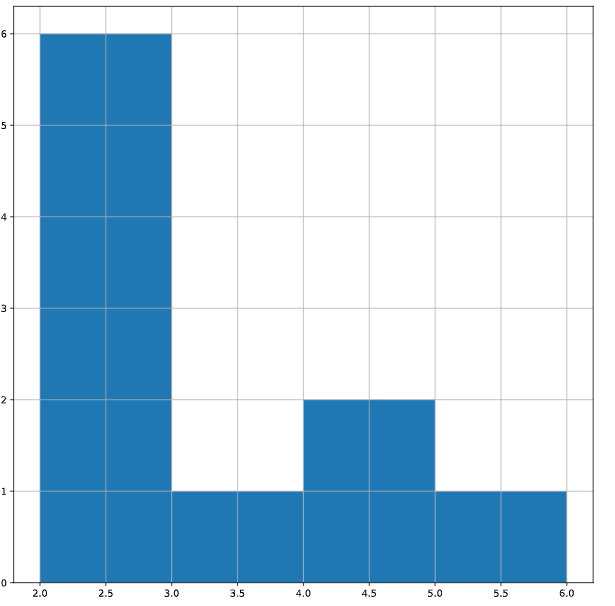


* Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.

```
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / 10

# Reset index and rename columns
size_dist = size_dist.reset_index(drop=True)
size_dist.columns = ['group_size', 'prob']

print(size_dist)
```

```
<script.py> output:
    0    0.6
    1    0.2
    2    0.1
    3    0.1
    Name: group_size, dtype: float64
```

* Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.

```
# Calculate expected value
expected_value = np.sum(size_dist['group_size']*size_dist['prob'])
print(expected_value)
```

```
2.9000000000000004
```

* Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

```
# Subset groups of size 4 or more
groups_4_or_more = size_dist['group_size'] >= 4

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more * size_dist['prob'])
print(prob_4_or_more)
```

```
<script.py> output:
    0.30000000000000004
```

**Continuous distributions**

##More Distributions and the Central Limit Theorem

##Correlation and Experimental Design